In [1]:
import qiskit
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
# from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
import numpy as np

In [2]:
def zero_plus_w_state(zero_state_prob, n_qubits):
    # Construct a quantum circuit that initialises qubits to a custom state
    circ = QuantumCircuit(n_qubits, n_qubits)

    # define the zero and one vector
    zero = [1, 0]
    one = [0, 1]

    total_state = 0 # initialize total_state as 0
    # compute the summation of single-one-states
    for i in range(n_qubits):
        # compute the current one-state
        # first set up all the base cases for kron product
        if i == n_qubits - 1:
            current_single_one_state = np.kron(zero, one)
        elif i == n_qubits - 2:
            current_single_one_state = np.kron(one, zero)
        else:
            current_single_one_state = np.kron(zero, zero)
        # Then tensor with the rest
        for j in range(2, n_qubits):
            if j == n_qubits - i - 1:
                current_single_one_state = np.kron(one, current_single_one_state)
            else:
                current_single_one_state = np.kron(zero, current_single_one_state)
        # Now add everything together
        total_state = total_state + current_single_one_state
    total_state = total_state * np.sqrt(1 - zero_state_prob) / np.sqrt(n_qubits) # normalization

    # compute the all-zero state
    # first set up all the base cases for kron product
    zero_state = np.kron(zero, zero) # Base case
    # Then tensor with the rest
    for j in range(2, n_qubits):
        zero_state = np.kron(zero, zero_state)
    total_state = total_state + zero_state * np.sqrt(zero_state_prob) # add zero-state to the total state

    # create a list for qubit execution
    qubit_list = []
    for i in range(n_qubits):
        qubit_list.append(i)
    circ.initialize(total_state, qubit_list)
    circ.measure(qubit_list, qubit_list)

    # Select the QasmSimulator from the Aer provider
    simulator = Aer.get_backend('qasm_simulator')

    # Execute and get counts
    result = execute(circ, simulator, shots=50000).result()
    counts = result.get_counts(circ)
    return counts

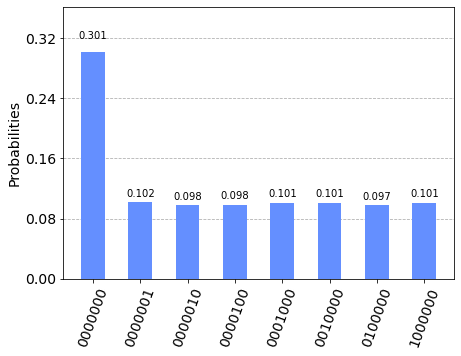

In [3]:
counts = zero_plus_w_state(0.3, 7)
plot_histogram(counts)